# Analysis on customers who purchased from Souq ecommerce

## Problem Statment

Souq.com one of the famous ecomerace in the midle east as its owned by amazon the world famous ecommerce. in souq there is alot of sellers offer their goods on the site hence there are many temptations for the buyer in terms of shipping, price or product rating. so this analysis will provide the seller an understanding of the customer needs

## Executive Summary



To analysis this problem we gathered data fome the Daily deal from souq.com  on some category to analysis how the coustomer react to offers and discounts، and which products attract most customer by thier gender. 

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory and Visualize the Data](#Exploratory-Data-Analysis)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Datasets Description

There are seven datasets all of them shows the products and it's price along with customer rating for the product, each data sets contain one category of product which we will join them togather and od our analysis on it.

## Data Import and Cleaning

In [2]:
#reading the datasets

In [3]:
Athletic_Shoes = pd.read_csv('./datasets/Athletic_Shoes.csv')
Casual_Shoes = pd.read_csv('./datasets/Casual_Shoes.csv')
eyewear = pd.read_csv('./datasets/eyewear.csv')
Perfumes_and_Fragrances = pd.read_csv('./datasets/Perfumes_and_Fragrances.csv')
Sportswear = pd.read_csv('./datasets/Sportswear.csv')
Wallets = pd.read_csv('./datasets/Wallets.csv')
watches = pd.read_csv('./datasets/watches.csv')

In [4]:
#shape of all data sets

In [5]:
(Athletic_Shoes.shape, Casual_Shoes.shape,  eyewear.shape, Perfumes_and_Fragrances.shape, Sportswear.shape,
    Wallets.shape, watches.shape)

((95, 8), (47, 8), (154, 8), (63, 8), (33, 8), (37, 8), (180, 8))

####  Display data

In [6]:
Athletic_Shoes.head(2)

,item_category,item_name,item_after_discount,item_price,percentage_solds,item_rating,item_shipping,buyer_gender
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.00SAR,211.48SAR,94.0,100.0,FREE Shipping,men
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.00SAR,289.99SAR,80.0,88.0,FREE Shipping,men


In [7]:
Casual_Shoes.head(2)

,item_category,item_name,item_after_discount,item_price,percentage_solds,item_rating,item_shipping,buyer_gender
0,Casual & Dress Shoes,Lacoste Casual Shoe For Men Size 45 EU - White,519.00SAR,295.98SAR,14.0,NaN,FREE Shipping,men
1,Casual & Dress Shoes,Lacoste Fairlead Fashion Sneakers Shoes For Me...,469.00SAR,268.49SAR,50.0,NaN,FREE Shipping,men


In [8]:
eyewear.head(2)

,item_category,item_name,item_after_discount,item_price,percentage_solds,item_rating,item_shipping,buyer_gender
0,Eyewear,"Carrera Sunglasses for Unisex , Black Aviator",650.00SAR,346.98SAR,52.0,NaN,FREE Shipping,Unisex
1,Eyewear,"Carrera Sunglasses For Unisex - Green Lens, 14...",750.00SAR,351.98SAR,25.0,80.0,FREE Shipping,Unisex


In [9]:
Perfumes_and_Fragrances.head(2)

,item_category,item_name,item_after_discount,item_price,percentage_solds,item_rating,item_shipping,buyer_gender
0,Perfumes & Fragrances,Calvin Klein Euphoria for Women - Eau de Parfu...,357.00SAR,111.21SAR,77,90,Eligible for FREE Shipping,women
1,Perfumes & Fragrances,"Lattafa Pure Musk for Unisex - Eau de Parfum, ...",55.00SAR,32.39SAR,64,86,Eligible for FREE Shipping,Unisex


In [10]:
Sportswear.head(2)

,item_category,item_name,item_after_discount,item_price,percentage_solds,item_rating,item_shipping,buyer_gender
0,Sportswear,Adidas Spain Home Football Jersey For Men - Re...,419.00SAR,175.98SAR,35.0,NaN,Eligible for FREE Shipping,men
1,Sportswear,Under Armour Training T-Shirt for Men,139.00SAR,79.99SAR,56.0,60.0,Eligible for FREE Shipping,men


In [11]:
Wallets.head(2)

,item_category,item_name,item_after_discount,item_price,percentage_solds,item_rating,item_shipping,buyer_gender
0,Wallets,"Tommy Hilfiger Bifold WAllet For Women,LeAther...",469.00SAR,172.48SAR,5.0,NaN,Eligible for FREE Shipping,women
1,Wallets,"Tommy Hilfiger Bifold Wallet For Women,Leather...",469.00SAR,172.48SAR,3.0,NaN,Eligible for FREE Shipping,women


In [12]:
watches.head(2)

,item_category,item_name,item_after_discount,item_price,percentage_solds,item_rating,item_shipping,buyer_gender
0,Watches,Michael Kors Lexington Women's Silver Dial Sta...,"1,698.00SAR",639.00SAR,85.0,92.0,NaN,women
1,Watches,Lacoste Women's Silver Dial Leather Band Watch...,929.00SAR,426.49SAR,77.0,100.0,FREE Shipping,women


#### describetion of the data

Each data contain items belongs to one category. Each datasets describe the items belong to the same category with is price and customer rating and percentage of items been sold through the website. 

####  Merge dataframes

Since all the data frame has the same lable and number of columns. we can join them all togather using contact method, than we can preforme any cleaning if needed on them. 

In [13]:
pdList = [Athletic_Shoes, Casual_Shoes,  eyewear, Perfumes_and_Fragrances, Sportswear,
    Wallets, watches]  # List of dataframes
df = pd.concat(pdList)

#### Investigate missing values

In [14]:
df.isnull().sum()

item_category            0
item_name                0
item_after_discount     26
item_price               0
percentage_solds        87
item_rating            182
item_shipping           42
buyer_gender            28
dtype: int64

In [15]:
df.isnull().sum().sum()

365

#### Display the data types of each feature

In [16]:
df.dtypes

item_category           object
item_name               object
item_after_discount     object
item_price              object
percentage_solds       float64
item_rating            float64
item_shipping           object
buyer_gender            object
dtype: object

#### Fix incorrect data types

by the look of the null value in percentage_sold, item_rating, and item_shipping we can assume that thier is no customer rating or any items been solds for the same spacific item.

The item price and the price before discount has the currency "SAR" which will be removed and change the type of the columns to float as the number has decimals.

In [17]:
df.head(2)

,item_category,item_name,item_after_discount,item_price,percentage_solds,item_rating,item_shipping,buyer_gender
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.00SAR,211.48SAR,94.0,100.0,FREE Shipping,men
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.00SAR,289.99SAR,80.0,88.0,FREE Shipping,men


In [18]:
#remove the , and SAR and change the type to float

In [19]:
df['item_price'] = df['item_price'].str.replace('[,SAR]', '').astype(float)

In [20]:
df['item_after_discount'] = df['item_after_discount'].str.replace('[,SAR]', '').astype(float)

In [21]:
df.head(2)

,item_category,item_name,item_after_discount,item_price,percentage_solds,item_rating,item_shipping,buyer_gender
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men


In [22]:
df.dtypes

item_category           object
item_name               object
item_after_discount    float64
item_price             float64
percentage_solds       float64
item_rating            float64
item_shipping           object
buyer_gender            object
dtype: object

#### Rename columns

Renaming the columns to more Understandable names.

In [23]:
df.columns = ['category', 'product', 'Original_price', 'price', 'perc_of_unit_sold', 'rating', 'shpping_rate', 'gender']

In [24]:
df.head(2)

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men


####  Data dictionary

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions

|Feature|Type|Description|
|---|---|---|
|category|object|Name of the category which the products belong to| 
|product|object|Name and few description of the product|
|Original_price|float|The original price of the product|
|price|float|product price after discount or offers|
|perc_of_unit_sold|object|percentage of the products been sold by the website in the daily deal|
|rating|float|customer rate for product |
|shpping_rate|object|Shipping options wich define if the product is eligible for free shiping or not|
|gender|object|which define the use of the product for which gender|




#### Saving the final Dataset

In [25]:
df.to_csv('./datasets/combined_datasets.csv')

## Exploratory and Visualize the Data 

In [26]:
df.describe()

,Original_price,price,perc_of_unit_sold,rating
count,583.000000,609.000000,522.000000,427.000000
mean,864.498113,339.434039,57.678161,87.807963
std,1803.365527,285.416406,25.434947,11.422350
min,42.000000,21.400000,2.000000,20.000000
25%,273.000000,140.980000,36.250000,82.000000
50%,499.000000,262.490000,60.000000,88.000000
75%,980.000000,444.990000,79.000000,96.000000
max,29970.000000,3220.000000,99.000000,100.000000


In [27]:
# exploaring the higher spender from both gender

In [28]:
spending  = df.groupby('gender').price.sum()

In [29]:
spending

gender
Unisex     31140.99
men       117041.47
women      50615.20
Name: price, dtype: float64

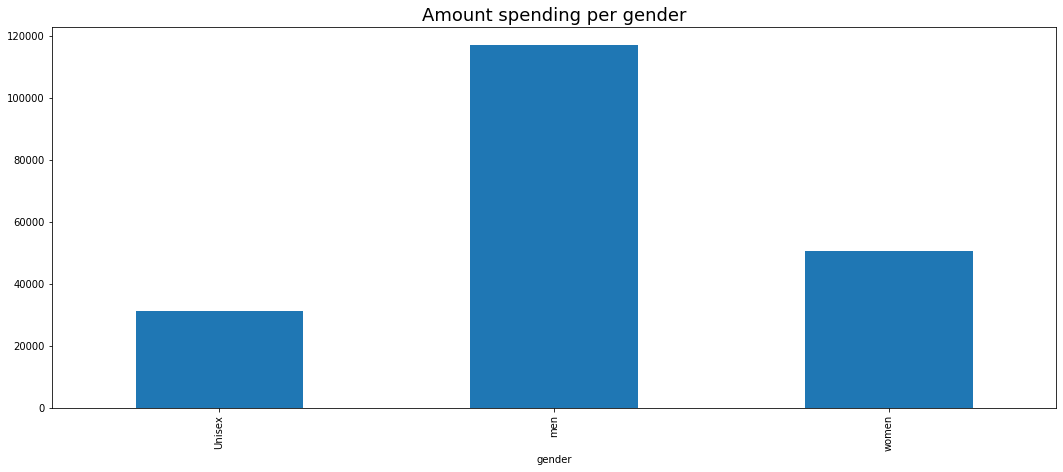

In [30]:
spending.plot(kind='bar', figsize=(18,7));
plt.title('Amount spending per gender', fontsize=18);

Men were spending money twice than women

In [31]:
#above average purchase per category

In [32]:
above_average_sale = df.groupby('category').perc_of_unit_sold.mean()

In [33]:
above_average_sale

category
Athletic Shoes           63.048780
Casual & Dress Shoes     52.028571
Eyewear                  48.307692
Perfumes & Fragrances    73.793651
Sportswear               51.142857
Wallets                  43.942857
Watches                  61.865772
Name: perc_of_unit_sold, dtype: float64

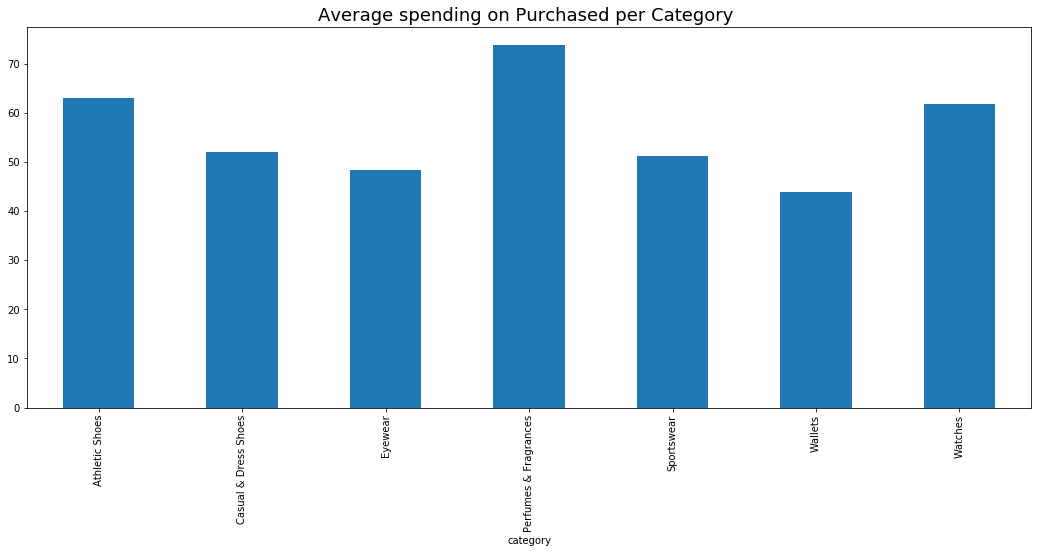

In [34]:
above_average_sale.plot(kind='bar', figsize=(18,7));
plt.title('Average spending on Purchased per Category ', fontsize=18);

In [35]:
X  = df.groupby(['shpping_rate', 'rating']).perc_of_unit_sold.mean()

In [36]:
X

shpping_rate                rating
Eligible for FREE Shipping  40.0      33.000000
                            56.0      52.000000
                            60.0      37.750000
                            66.0      76.000000
                            70.0      57.000000
                            74.0      39.000000
                            76.0      71.000000
                            78.0      70.200000
                            80.0      62.454545
                            82.0      72.285714
                            84.0      68.500000
                            86.0      73.437500
                            88.0      74.529412
                            90.0      66.380952
                            92.0      82.333333
                            94.0      59.800000
                            96.0      60.000000
                            98.0      69.000000
                            100.0     62.166667
FREE Shipping               20.0      53.500000
     

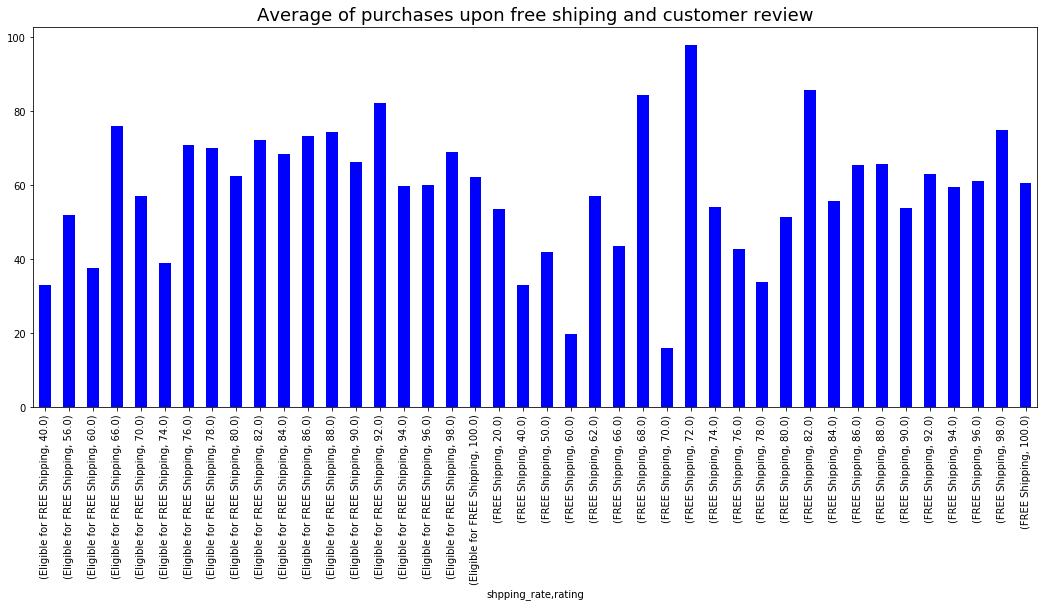

In [37]:
X.plot(kind='bar', figsize=(18,7), color='blue');
plt.title('Average of purchases upon free shiping and customer review', fontsize=18);

We can conclude that customer lean to purchased product labeled for free shipping and with good customer review or its eligible for free shiping  

## Concluding 

it will be verey helpful if we have the customers ID linked to thier purchase so we can do more analysis in individual and improve the analysis to attract more customers to the website with their tempting goods 

# Kaggle Kernal

https://www.kaggle.com/mohammedbuhliagah/analysis-on-customers-who-purchased-from-souq-ecom